## Simple Neural Network

It is a simple classfication problem using HR Data.   It's an attrition prediction. The target variable is 'left'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np


In [5]:
## Reading the data
df = pd.read_csv("/content/sample_data/hr_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
## Checking the missing values
df.isnull().sum()

## There are no missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
## Checking the target variable
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Neural networks will accept only numerical data.  Hence we will convert all categorical data into a numerical data using get_dummeis function

In [11]:
feats = ['department','salary']
df_final = pd.get_dummies(df,columns=feats,drop_first=True)

In [12]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [13]:
## Creating Independent and dependent variables
X = df_final.drop(['left'],axis=1).values
y = df_final['left'].values

In [14]:
## Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [15]:
## Scalling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train.shape, X_test.shape

((11249, 18), (3750, 18))

### Let us build an ML model

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [18]:
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred)*100,2), '%')

Accuracy Score:  79.55 %


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2891
           1       0.59      0.36      0.44       859

    accuracy                           0.80      3750
   macro avg       0.71      0.64      0.66      3750
weighted avg       0.77      0.80      0.78      3750



In [22]:
print(confusion_matrix(y_test, y_pred))

[[2676  215]
 [ 552  307]]


### Building the Neural Network

In [23]:
## Let us import the required libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
classifier = Sequential()  ## Instantiate the model

In [ ]:
X_train.shape

(11249, 18)

In [25]:
## Adding the layers.
classifier.add(Dense(18, kernel_initializer = "uniform",activation = "relu", input_dim=18))  ## Input Layer
classifier.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))  ## Hidden Layer

In [26]:
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))  ## Output Layer

In [27]:
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [28]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [29]:
classifier.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
352/352 [==============================] - 4s 3ms/step - loss: 0.4758 - accuracy: 0.7583
Epoch 2/50
352/352 [==============================] - 1s 3ms/step - loss: 0.3105 - accuracy: 0.8532
Epoch 3/50
352/352 [==============================] - 1s 3ms/step - loss: 0.2518 - accuracy: 0.9213
Epoch 4/50
352/352 [==============================] - 1s 3ms/step - loss: 0.2211 - accuracy: 0.9306
Epoch 5/50
352/352 [==============================] - 1s 3ms/step - loss: 0.1968 - accuracy: 0.9374
Epoch 6/50
352/352 [==============================] - 1s 3ms/step - loss: 0.1781 - accuracy: 0.9468
Epoch 7/50
352/352 [==============================] - 1s 3ms/step - loss: 0.1663 - accuracy: 0.9518
Epoch 8/50
352/352 [==============================] - 1s 3ms/step - loss: 0.1577 - accuracy: 0.9558
Epoch 9/50
352/352 [==============================] - 1s 3ms/step - loss: 0.1516 - accuracy: 0.9574
Epoch 10/50
352/352 [==============================] - 1s 3ms/step - loss: 0.1456 - accuracy: 0.9605

In [30]:
y_pred = classifier.predict(X_test)

118/118 [==============================] - 0s 1ms/step


In [ ]:
y_pred[:10]

array([[0.02815126],
       [0.00289732],
       [0.00256498],
       [0.01679473],
       [0.00209251],
       [0.00711509],
       [0.02024761],
       [0.99466705],
       [0.99494374],
       [0.01290044]], dtype=float32)

In [31]:
y_pred = np.round(y_pred)

In [ ]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm


array([[2852,   39],
       [  91,  768]])

In [33]:
## Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2891
           1       0.95      0.89      0.92       859

    accuracy                           0.97      3750
   macro avg       0.96      0.94      0.95      3750
weighted avg       0.97      0.97      0.96      3750



## Using validation_split

In [34]:
classifier.fit(X_train, y_train, batch_size = 16, epochs = 50, validation_split=0.2)

Epoch 1/50
563/563 [==============================] - 2s 3ms/step - loss: 0.1054 - accuracy: 0.9687 - val_loss: 0.1079 - val_accuracy: 0.9684
Epoch 2/50
563/563 [==============================] - 2s 3ms/step - loss: 0.1034 - accuracy: 0.9698 - val_loss: 0.1025 - val_accuracy: 0.9680
Epoch 3/50
563/563 [==============================] - 2s 3ms/step - loss: 0.1025 - accuracy: 0.9697 - val_loss: 0.1043 - val_accuracy: 0.9698
Epoch 4/50
563/563 [==============================] - 2s 3ms/step - loss: 0.1016 - accuracy: 0.9694 - val_loss: 0.1032 - val_accuracy: 0.9711
Epoch 5/50
563/563 [==============================] - 2s 3ms/step - loss: 0.0992 - accuracy: 0.9707 - val_loss: 0.1038 - val_accuracy: 0.9693
Epoch 6/50
563/563 [==============================] - 2s 3ms/step - loss: 0.1001 - accuracy: 0.9708 - val_loss: 0.1058 - val_accuracy: 0.9684
Epoch 7/50
563/563 [==============================] - 2s 3ms/step - loss: 0.1003 - accuracy: 0.9707 - val_loss: 0.1067 - val_accuracy: 0.9671
Epoch 

In [35]:
classifier.evaluate(X_test, y_test)

118/118 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9667


[0.12137316167354584, 0.9666666388511658]

In [36]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
## Classification Report
print(classification_report(y_test, y_pred))

118/118 [==============================] - 0s 1ms/step
[[2851   40]
 [  85  774]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2891
           1       0.95      0.90      0.93       859

    accuracy                           0.97      3750
   macro avg       0.96      0.94      0.95      3750
weighted avg       0.97      0.97      0.97      3750



## Using callbacks

In [37]:
## function to plot the history of callbacks.
def plot_loss(loss,val_loss):
  plt.figure(figsize=(15,8))
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()


In [38]:
h_callback = classifier.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0935 - accuracy: 0.9719 - val_loss: 0.1243 - val_accuracy: 0.9643
Epoch 2/100
704/704 [==============================] - 3s 5ms/step - loss: 0.0937 - accuracy: 0.9722 - val_loss: 0.1231 - val_accuracy: 0.9653
Epoch 3/100
704/704 [==============================] - 3s 4ms/step - loss: 0.0924 - accuracy: 0.9720 - val_loss: 0.1216 - val_accuracy: 0.9653
Epoch 4/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0912 - accuracy: 0.9729 - val_loss: 0.1210 - val_accuracy: 0.9637
Epoch 5/100
704/704 [==============================] - 3s 4ms/step - loss: 0.0920 - accuracy: 0.9721 - val_loss: 0.1192 - val_accuracy: 0.9643
Epoch 6/100
704/704 [==============================] - 3s 4ms/step - loss: 0.0907 - accuracy: 0.9724 - val_loss: 0.1218 - val_accuracy: 0.9640
Epoch 7/100
704/704 [==============================] - 3s 4ms/step - loss: 0.0916 - accuracy: 0.9727 - val_loss: 0.1194 - val_accuracy: 0.9653

In [39]:
type(h_callback)

keras.callbacks.History

In [40]:
h_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

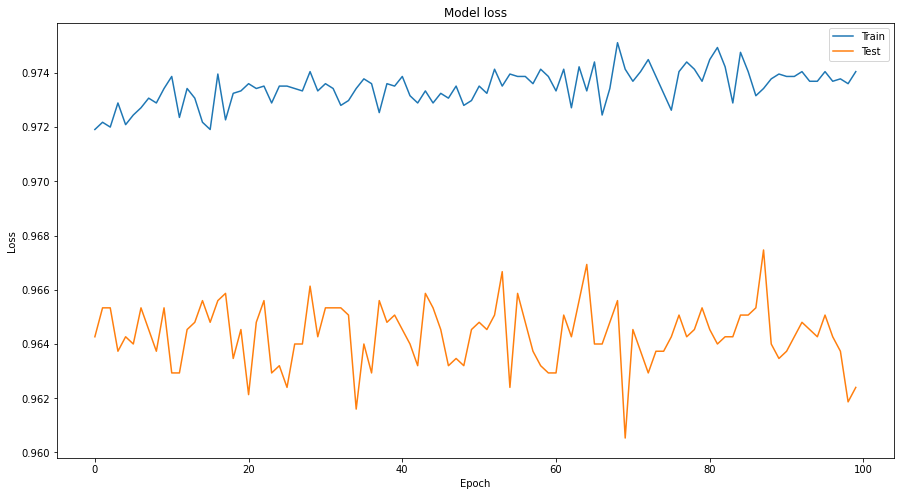

In [43]:
import  matplotlib.pyplot as plt
# Plot train vs test loss during training
plot_loss(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


In [42]:
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
## Classification Report
print(classification_report(y_test, y_pred))

118/118 [==============================] - 0s 1ms/step
[[2855   36]
 [ 105  754]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2891
           1       0.95      0.88      0.91       859

    accuracy                           0.96      3750
   macro avg       0.96      0.93      0.95      3750
weighted avg       0.96      0.96      0.96      3750



### Early Stopping Callback

In [44]:
## Importing the EarlyStopping call back function
from keras.callbacks import EarlyStopping

In [45]:
earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [46]:
h_callback = classifier.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data=(X_test, y_test), callbacks=[earlystopping])

Epoch 1/100
704/704 [==============================] - 3s 4ms/step - loss: 0.0821 - accuracy: 0.9741 - val_loss: 0.1278 - val_accuracy: 0.9619
Epoch 2/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0826 - accuracy: 0.9737 - val_loss: 0.1255 - val_accuracy: 0.9643
Epoch 3/100
704/704 [==============================] - 3s 4ms/step - loss: 0.0833 - accuracy: 0.9751 - val_loss: 0.1231 - val_accuracy: 0.9656
Epoch 4/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0825 - accuracy: 0.9745 - val_loss: 0.1224 - val_accuracy: 0.9643
Epoch 5/100
704/704 [==============================] - 3s 4ms/step - loss: 0.0844 - accuracy: 0.9731 - val_loss: 0.1244 - val_accuracy: 0.9632
Epoch 6/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0822 - accuracy: 0.9744 - val_loss: 0.1227 - val_accuracy: 0.9635
Epoch 7/100
704/704 [==============================] - 3s 4ms/step - loss: 0.0827 - accuracy: 0.9742 - val_loss: 0.1235 - val_accuracy: 0.9640

In [47]:
classifier.evaluate(X_test, y_test)

118/118 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9629


[0.12581558525562286, 0.962933361530304]

In [48]:
y_pred = classifier.predict(X_test)

118/118 [==============================] - 0s 1ms/step


In [49]:
y_pred = np.round(y_pred)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2891
           1       0.95      0.88      0.92       859

    accuracy                           0.96      3750
   macro avg       0.96      0.93      0.95      3750
weighted avg       0.96      0.96      0.96      3750



In [51]:
confusion_matrix(y_pred, y_test)

array([[2853,  101],
       [  38,  758]])

### Dropoug nodes in layers

It will be helpful to remove unwanted features when you have large number of features and/or adding large number of nodes.

In [53]:
## Importing the dropout function from keras.layers.
from keras.layers import Dropout

In [65]:
model = Sequential()
model.add(Dropout(0.2, input_shape = (18,)))
model.add(Dense(18, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9, kernel_initializer='uniform', activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))  ## Output Layer

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [67]:
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
282/282 [==============================] - 2s 4ms/step - loss: 0.5320 - accuracy: 0.7559 - val_loss: 0.4025 - val_accuracy: 0.7707
Epoch 2/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 0.7560 - val_loss: 0.3572 - val_accuracy: 0.7707
Epoch 3/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.7963 - val_loss: 0.3306 - val_accuracy: 0.8573
Epoch 4/50
282/282 [==============================] - 1s 3ms/step - loss: 0.3930 - accuracy: 0.8230 - val_loss: 0.3168 - val_accuracy: 0.8787
Epoch 5/50
282/282 [==============================] - 1s 3ms/step - loss: 0.3926 - accuracy: 0.8245 - val_loss: 0.3115 - val_accuracy: 0.8867
Epoch 6/50
282/282 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 0.8358 - val_loss: 0.2991 - val_accuracy: 0.9093
Epoch 7/50
282/282 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8346 - val_loss: 0.2966 - val_accuracy: 0.9062
Epoch 

In [68]:
model.evaluate(X_test, y_test)

118/118 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.9008


[0.26978766918182373, 0.9007999897003174]

In [69]:
y_pred = np.round(model.predict(X_test))

118/118 [==============================] - 0s 1ms/step


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2891
           1       0.74      0.89      0.80       859

    accuracy                           0.90      3750
   macro avg       0.85      0.90      0.87      3750
weighted avg       0.91      0.90      0.90      3750

